In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pygimli as pg
from pygimli.viewer.mpl import drawModel1D

In [2]:
nl = 3
lam = 30.0
errPerc = 8.0
ab2 = np.logspace(0, 2, 17)
mn2 = 0.3 * np.ones(ab2.size)

In [3]:
f = pg.core.DC1dModelling(nl, ab2, mn2)

In [4]:
res = [100.0, 10.0, 1000.0]
thk = [6.0, 4.0]

In [5]:
rhoa = f(thk + res)
rhoa = rhoa * (np.random.randn(len(rhoa)) * errPerc / 100. + 1.)

In [6]:
transThk = pg.trans.TransLog()
transRho = pg.trans.TransLogLU(1.0,2000.0)
transRhoa = pg.trans.TransLog()

In [7]:
f.region(0).setTransModel(transThk)
f.region(1).setTransModel(transRho)

In [8]:
paraDepth = max(ab2) / 3.0
f.region(0).setStartValue(paraDepth / nl / 4.0)
f.region(1).setStartValue(np.median(rhoa))

In [9]:
inv = pg.core.Inversion(rhoa, f, transRhoa, True)
inv.setLambda(lam)
inv.setMarquardtScheme(0.9)
model = f.createStartVector()
model[nl] *= 1.0
inv.setModel(model)

In [10]:
model = inv.run()

In [11]:
resnew, thknew = model[nl-1:nl*2-1], model[0:nl-1]

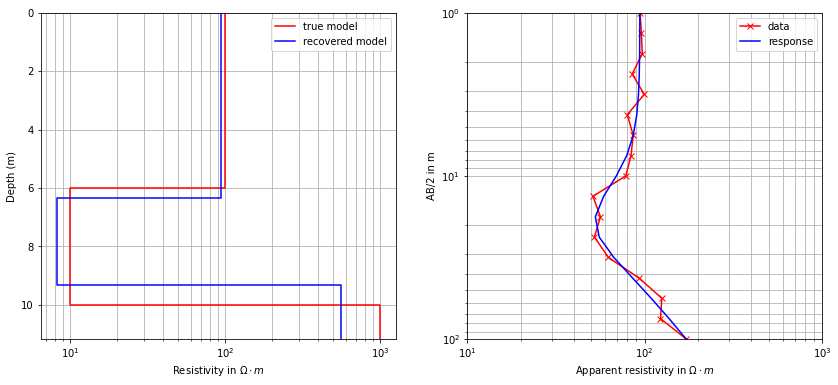

In [12]:
fig, ax = plt.subplots(ncols=2, figsize=(14,6))
drawModel1D(ax[0], thk, res, plot='semilogx', color='r', label='true model')
drawModel1D(ax[0], thknew, resnew, color='b', label='recovered model', xlabel='Resistivity in $\Omega\cdot m$')
ax[0].grid(True, which='both')
ax[0].legend(loc='best')

ax[1].loglog(rhoa, ab2, 'rx-', label='data')
ax[1].loglog(inv.response(), ab2, 'b-', label='response')
ax[1].set_ylim((max(ab2), min(ab2)))
ax[1].set_xlim((10.0, 1000.0))
ax[1].grid(True, which='both')
ax[1].legend(loc='best')
ax[1].set_xlabel(r'Apparent resistivity in $\Omega\cdot m$')
ax[1].set_ylabel('AB/2 in m')

plt.show()

In [13]:
print(thknew[1] / resnew[1])

0.36024135210175395


In [14]:
print(thk[1] / res[1])

0.4
